> {sub-ref}`today` | {sub-ref}`wordcount-minutes` min read

::::{figure} ../../figuras/logos/Logo_TalentQ_Azul.png
:width: 150px
:align: right
::::


# Probabilidades 

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\mathbb H}} $



In [1]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex
import copy 

## Variables aleatorias

Denotamos con $(X,p(X))$ una  *variable aleatoria* donde

- $X$ es el espacio muestral de valores $\{x_1, x_2,....,x_n\}$ que pueden aparecer en una *consulta* la variable aleatoria


- $p(X)$ es la *distribución de probabilidad* 

### Distribución de probabilidad

Una distribución de probabilidad es una función real $x\to p(x)$ que debe  verificar las dos condiciones siguientes

$$
p(x) \in [0,1]~~~~~~~,~~~~~~~~\sum_{x\in X }p(x) = 1 
$$
Es decir, la suma de probabilidades de todos los sucesos posibles debe ser la unidad.

::::{card} 



<b>Media</b>: la <i>media</i> de una variable aleatoria  viene dada por la expresión 

$$
\overline X  = \sum_i x_i p(x_i)
$$

::::


::::{card} 



<b>Varianza</b>: la <i>varianza</i>, $\sigma_X^2$, es la <i>media de la desviación cuadrática</i> $\overline{(x_i - \overline{X} )^2}$ 


$$ 
\sigma^2_X = \sum_j (x_j-\overline{X})^2 p(x_j) = \overline{X^2} - \overline{X}^2
$$

La cantidad $\sigma_X$ se denomina  <i>desviación estándar</i>

$$
\sigma_X = \sqrt{\overline{X^2} - \overline{X}^2}
$$
::::


## La conexión estadística

- Nuestro conocimiento del mundo se basa en la realización de experimentos, el resultado de los cuales es (empíricamente) aleatorio. 

- Podemos pensar en el hecho de medir un sistema como la consulta de una variable aleatoria $(X,p(X))$ donde la distribución de probabilidad incorpora todo nuestro conocimiento acerca del sistema

### Frecuencias e Histogramas


Cualquier consulta o medida da lugar a una *muestra* finita de valores $A_N = (a_1,a_2,...,a_N)$ donde $a_i\in \{x_1,...,x_n\}$ pueden repetirse en la muestra, con números de aparición $n(x_i)$ tales que  $n(x_1) +  \ldots + n(x_p) = N$. 

Estos datos se pueden agrupar en intervalos o *bins* que eliminen cierta precisión numérica. 

Por ejemplo, si truncamos nuestra precisión a las décimas de unidad,  $13.10$ y $13.19$ pertenecerán al mismo *bin*.

Un histograma es un diagrama en el que, por cada *bin*, hay una columna, cuya altura representa el número de sucesos que pertenecen a dicho *bin*

En el siguiente ejemplo, puedes ver cómo, la misma lista de datos conduce a distintos histogramas si cambias la anchura de los bins

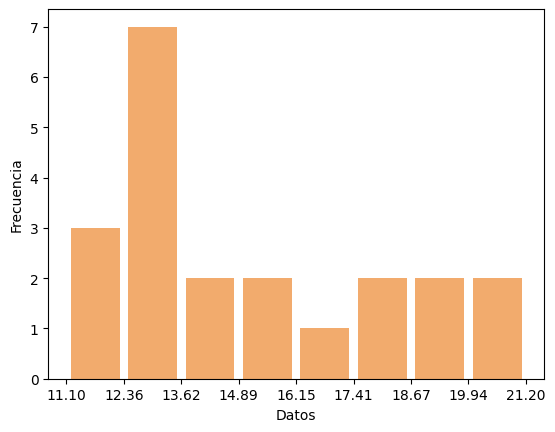

In [2]:
import numpy as np
import matplotlib.pyplot as plt

datos1 = [12.2, 15.3, 13, 12.8, 18.1, 13, 20, 19.5, 20.2, 12.1, 12.4, 13.2, 17.9, 14.1, 15, 13.4, 11.1, 14.6, 13, 17.4, 19.2]
datos2 = np.linspace(0.,10.,20)
datos  = datos1

anchura_bins = 1.# para modificar la anchura de los bins
num_bins = int((max(datos)-min(datos))/anchura_bins) #número de bins
bins_list = np.linspace(min(datos), max(datos) + 1 ,num_bins) #calculamos los extremos de los intervalos


counts, bins, ignore = plt.hist(x=datos, bins = bins_list, color='#F2AB6D', rwidth=0.85)
plt.xlabel('Datos')
plt.ylabel('Frecuencia')
plt.xticks(bins_list)

plt.show()


### Ley de los grandes números

Las fracciones relativas tienden en el límite $N\to \infty$ a la probabilidad relativa de aparición de  $x_i$ en una sola tirada

$$
f_N(x_i) = \frac{n(x_i)}{N}~~~\stackrel{N\to\infty}{\longrightarrow}~~~{p(x_i)}
$$


Experimentalmente sólo tenemos acceso a las frecuencias relativas $f_N(x_i)$ para un $N$ grande aunque finito.

Igualmente, nuestro conocimiento de la  media $\overline X$  y la varianza $\sigma_X^2$ siempre es aproximado, y se realiza a través de las medias y varianzas muestrales

$$
\begin{eqnarray*}
\overline{A}_N = \sum_i x_i f_N(x_i)~~~&\stackrel{N\to\infty}{\longrightarrow}&~~~ \overline{X}\\
\sigma_{A_N}^2 = \sum_{i} (x_i - \overline{A}_N)^2 f_N(x_i) ~~~&\stackrel{N\to\infty}{\longrightarrow}&~~~ \sigma_X^2
\end{eqnarray*}
$$

## Distribuciones frecuentes

### La distribución de Bernouilli

Una variable aleatoria de Bernouilli $X=(x,p(x))$ tiene dos posibles resultados

   - *éxito* $\to x=1$ con probabilidad $p(1) = p$
   
            
   - *fracaso* $\to x=0$ con probabilidad $p(0) = 1-p$



Podemos calcular fácilmente 

$$
\begin{eqnarray}
\overline X &=& \sum_i x_i p_i =1 \cdot p + 0\cdot (1-p) = p\\
\sigma^2 &=& \sum_i (x-\overline X )^2p_i = (1-p)^2 p +(0-p)^2(1-p) = p(1-p)
\end{eqnarray}
$$

### Distribución binomial

La variable aleatoria binomial $X = (x,p(x))$ se define como

$$
x = \hbox{número de $éxitos$ obtenidos en $n$ pruebas de Bernouilli sucesivas }
$$

Claramente $x \in (0,1,2,...n)$.

Ahora es muy sencillo obtener la probabilidad de un suceso con $x$ éxitos

$$
p(x) = \begin{pmatrix}n\\ x\end{pmatrix} p^x (1-p)^{n-x}
$$

donde el primer factor tiene en cuenta las posibles ordenaciones en que aparecen $x$ éxitos en $n$ intentos.



Un cálculo un poco más largo permite ver que, ahora

\begin{eqnarray}
\overline X &=&  np\\ \rule{0mm}{7mm}
\sigma^2 &=& n p(1-p)
\end{eqnarray}

### La distribución normal

Vamos a estudiar la distribución normal centrada en $\mu$ y con anchura $\sigma$


$$
p(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp \left({-\frac{(x-\mu)^2}{2\sigma^2}}\right)
$$

Nos encontramos ante una variable aleatoria con un espacio muestral continuo $x\in (-\infty,+\infty)$.

\begin{eqnarray}
\overline{X} &=& \int_{-\infty}^{+\infty} xp(x) dx = \mu \\
\overline{(x-\overline X)^2} &=& \int_{-\infty}^{+\infty} (x-\mu)^2 p(x)dx =\sigma^2
\end{eqnarray}


In [3]:
'generamos una instancia de la distribución normal'
mu, sigma = 0, 0.1 
N = 10000
s = np.random.normal(mu, sigma, N)

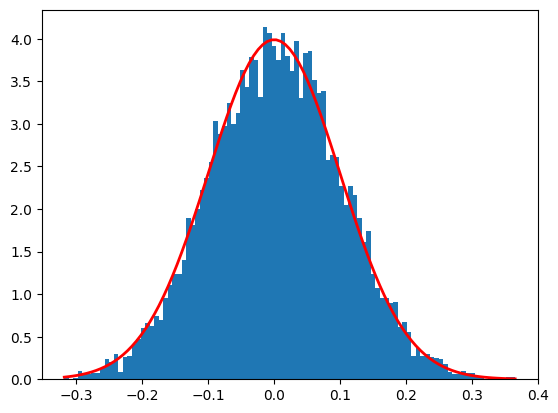

In [4]:
import matplotlib.pyplot as plt


'generamos una instancia de histograma con un número de bins'
num_bins=100
counts, bins, ignore = plt.hist(s, num_bins, density=True)
'extraemos los bins para hacer el plot de la funcion analítica'


'dibujamos la función analítica para comparar'
def gaussian(x,mu,sigma):
    return 1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (x - mu)**2 / (2 * sigma**2) )
    
plt.plot(bins, gaussian(bins,mu,sigma),linewidth=2, color='r')

plt.show()

En el límite de número de eventos $N\to \infty$, el histograma y la curva matemática confluyen.

## Probabilidades combinadas



Las probabilidades combinadas son *la base de las correlaciones*. Es aquí donde la Mecánica Cuántica *predice* resultados diferentes a la Mecánica Clásica.

Ahora vamos a examinar variables aleatorias formadas por dos espacios muestrales $X$ e $Y$. Dependiendo de la forma en que combinemos la observación de cada una tendremos distintas distribuciones de probabilidad

### Probabilidad combinada

La  *probabilidad combinada* $p(X,Y)$ asocia un número $p(x,y)$ a la probabilidad de observación conjunta de $x$ **e** $y$.

Hay que tratar las parejas de eventos  como un solo evento  $a = (x,y)$. Por eso, la condición de normalización ahora es 

$$
\sum_a p(a) = \sum_{xy} p(x,y) = 1\, .
$$


La suma parcial sobre una de las dos variables conduce a sendas **distribuciones marginales**

$$
q(x) = \sum_{y} p(x,y) ~~~~~~~~~ \tilde q(y) = \sum_{x} p(x,y)
$$



 Si la probabilidad combinada es el producto de las probabilidades de los miembros del par, decimos que $X$ e $Y$ son **variables aleatorias independientes**

$$
p(x,y) = p(x) p(y)
$$



La distribución de cada variable coincide con la que se deduce de marginalizar la otra

$$
\sum_y p(x,y) = p(x)~~~~,~~~~\sum_x p(x,y) = p(y)
$$

### Probabilidad condicionada

La distribución de **probabilidad condicionada** $p(X|Y)$ asigna un número $p(x|y)$ a la probabilidad  de encontrar un suceso $X=x$ una vez *sabemos* que $Y=y$ ha sido el resultado de consultar $Y$. 

La manera de acceder experimentalmente a estas distribuciones, es efectuar un muestreo $(a_i,b_i)$, $i=1,...,N$ de valores de $(X,Y)$ y *seleccionar* sólo aquellos sucesos donde $b_i = y$ un valor concreto de $Y$.

#### Teorema de Bayes

Las probabilidades *condicionales* y *combinadas* no son independientes. Se relacionan de la forma siguiente

$$
p(x,y)   = p(x|y)p(y) = p(y|x) p(x)= p(y,x)
$$

La segunda igualdad conduce al *teorema de Bayes*
::::{card} 
<b>Teorema</b>: </i>de Bayes</i> 

^^^
$$
p(x|y) = p(y|x) \frac{p(x)}{p(y)}
$$

::::
